**复习：**在前面我们已经学习了Pandas基础，第二章我们开始进入数据分析的业务部分，在第二章第一节的内容中，我们学习了**数据的清洗**，这一部分十分重要，只有数据变得相对干净，我们之后对数据的分析才可以更有力。而这一节，我们要做的是数据重构，数据重构依旧属于数据理解（准备）的范围。

#### 开始之前，导入numpy、pandas包和数据

In [1]:
# 导入基本库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-dark')

In [2]:
# 载入上一个任务人保存的文件中:result.csv，并查看这个文件
df = pd.read_csv('result.csv')
df.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,NaN,S


# 2 第二章：数据重构


## 第一部分：数据聚合与运算

### 2.6 数据运用

#### 2.6.1 任务一：通过教材《Python for Data Analysis》P303、Google or anything来学习了解GroupBy机制

In [3]:
#写入心得
#一般用法：df['columns'].groupby('key').mean() 
#先分组再选择列聚合：df.groupby('key')['columns'].mean()
#可以通过不同的方式进行分组，比如内置函数、分层索引、字典或者Series
#可以通过groupby的自定义函数agg进行聚合
#可以通过groupby的自定义函数apply进行聚合（适用性更广）


#### 2.4.2：任务二：计算泰坦尼克号男性与女性的平均票价

In [4]:
# 写入代码
df.groupby('Sex')['Fare'].mean()

Sex
female    44.479818
male      25.523893
Name: Fare, dtype: float64

In [5]:
df.groupby(['Sex']).agg({'Fare':'mean','Age':'mean'})

,Fare,Age
Sex,,
female,44.479818,27.915709
male,25.523893,30.726645


在了解GroupBy机制之后，运用这个机制完成一系列的操作，来达到我们的目的。

下面通过几个任务来熟悉GroupBy机制。

#### 2.4.3：任务三：统计泰坦尼克号中男女的存活人数

<AxesSubplot:xlabel='Sex'>

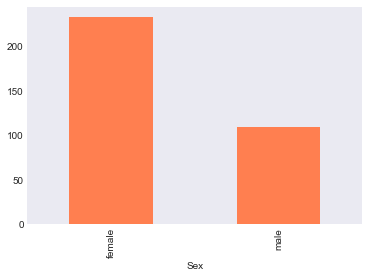

In [32]:
# 写入代码
Survived_sex = df[df['Survived']==1].groupby('Sex')
Survived_sex['Survived'].count().plot.bar(x = 'Sex',y = 'Survived',color = '#FF7F50') # 做出来了，开心！！！！！！！！！

#### 2.4.4：任务四：计算客舱不同等级的存活人数

<AxesSubplot:xlabel='Pclass'>

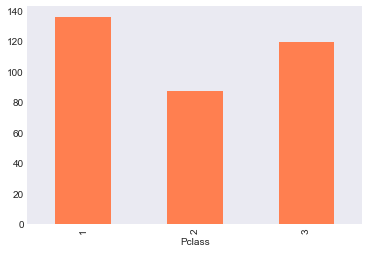

In [33]:
# 写入代码
Survived_Pclass = df[df['Survived']==1].groupby('Pclass')['Survived']
Survived_Pclass.count().plot.bar(x = 'Pclass',y = 'Survived',color = '#FF7F50')

In [8]:
# 可以计算不同客舱的幸存人数,可以提取出首字母，组成A、B、C、D等客舱
Survived_Cabin = df[df['Survived']==1].groupby('Cabin')['Survived']
Survived_Cabin.count()

Cabin
A16      1
A20      1
A23      1
A26      1
A31      1
        ..
F E69    1
F2       2
F33      3
F4       2
G6       2
Name: Survived, Length: 101, dtype: int64

<AxesSubplot:xlabel='Embarked'>

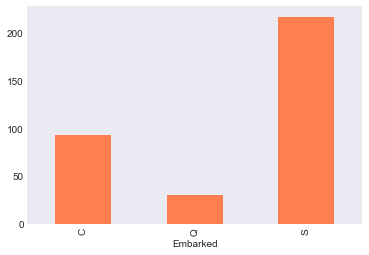

In [34]:
# 可以计算不同登录港口的幸存人数
Survived_Embarked = df[df['Survived']==1].groupby('Embarked')['Survived']
Survived_Embarked.count().plot(x='Embarked',y='Survived',kind='bar',color = '#FF7F50')

各个年龄段的幸存人数


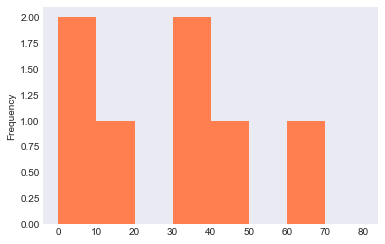

In [37]:
# 可以对年龄进行分箱，看每个年龄段的幸存人数
bins = [0,10,20,30,40,50,60,70,80]
ages = df['Age']
df['AgeCut'] = pd.cut(ages,bins,labels= ['0~10','10~20',30,40,50,60,70,80])

Survived_AgeCut = df[df['Survived']==1].groupby('AgeCut')['Survived']
Survived_AgeCut.count().plot.hist(x='Age',y='Survived',bins=bins,color = '#FF7F50'),
print('各个年龄段的幸存人数')


【**提示：**】表中的存活那一栏，可以发现如果还活着记为1，死亡记为0

【**思考**】从数据分析的角度，上面的统计结果可以得出那些结论

In [11]:
#思考心得 
# 女性群体存活人数更多
# 存货人群里10岁~40岁占比最大
# S港口登船的人群幸存人数最多
# 1# 和 3#客舱幸存人数最多


【思考】从任务二到任务三中，这些运算可以通过agg()函数来同时计算。并且可以使用rename函数修改列名。你可以按照提示写出这个过程吗？

In [12]:
#思考心得
df.groupby(['Sex']).agg({'Fare':'mean','Survived':'count'}).rename(columns=
                            {'Fare': 'mean_fare', 'Survived': 'count_pclass'})




,mean_fare,count_pclass
Sex,,
female,44.479818,314
male,25.523893,577


#### 2.4.5：任务五：统计在不同等级的票中的不同年龄的船票花费的平均值

In [13]:
# 写入代码
bins = [0,10,20,30,40,50,60,70,80]
ages = df['Age']
df['AgeCut'] = pd.cut(ages,bins,labels= ['0~10','10~20',30,40,50,60,70,80])


df.groupby(['Pclass','AgeCut'])['Fare'].mean()


Pclass  AgeCut
1       0~10      128.319433
        10~20     114.106250
        30         96.415832
        40         99.220322
        50         74.080411
        60         64.920500
        70         65.946209
        80         38.052800
2       0~10       28.740200
        10~20      20.934489
        30         21.316803
        40         20.685465
        50         21.500000
        60         18.281250
        70         10.500000
        80               NaN
3       0~10       24.415055
        10~20      12.217251
        30         10.492922
        40         13.263884
        50         13.018613
        60          7.630840
        70          7.858333
        80          7.762500
Name: Fare, dtype: float64

#### 2.4.6：任务六：将任务二和任务三的数据合并，并保存到sex_fare_survived.csv

In [14]:
# 写入代码
AvgFare_sex = df.groupby('Sex')['Fare'].mean()
Survived_sex = df[df['Survived']==1].groupby('Sex')
Survived_count = Survived_sex['Survived'].count()
sex_fare_survived = pd.merge(AvgFare_sex,Survived_count,on='Sex')
sex_fare_survived.to_csv('sex_fare_survived1.csv')


#### 2.4.7：任务七：得出不同年龄的总的存活人数，然后找出存活人数最多的年龄段，最后计算存活人数最高的存活率（存活人数/总人数）


In [15]:
# 年龄分段
df = pd.read_csv('result.csv')
bins = [0,10,20,30,40,50,60,70,80]
ages = df['Age']
df['AgeCut'] = pd.cut(ages,bins,labels= ['0~10','10~20','20~30','30~40','40~50','50~60','60~70','70~80']) 
df.head(3)

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeCut
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S,20~30
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C,30~40
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S,20~30


In [16]:
# 不同年龄总的存活人数
Survived = df[df['Survived']==1].groupby('AgeCut')['Survived'].count()
Survived = pd.DataFrame(Survived)
Survived,print('幸存的人数')

幸存的人数


(        Survived
 AgeCut          
 0~10          38
 10~20         44
 20~30         84
 30~40         69
 40~50         33
 50~60         17
 60~70          4
 70~80          1,
 None)

In [17]:
total = df.groupby('AgeCut')['PassengerId'].count()
total = pd.DataFrame(total)
total,print('总人数的年龄分布')

总人数的年龄分布


(        PassengerId
 AgeCut             
 0~10             64
 10~20           115
 20~30           230
 30~40           155
 40~50            86
 50~60            42
 60~70            17
 70~80             5,
 None)

In [18]:
percent_survived = pd.merge(Survived,total,on='AgeCut')
percent_survived

,Survived,PassengerId
AgeCut,,
0~10,38,64
10~20,44,115
20~30,84,230
30~40,69,155
40~50,33,86
50~60,17,42
60~70,4,17
70~80,1,5


In [19]:

percent_survived['per'] = percent_survived['Survived']/percent_survived['PassengerId']
percent_survived.rename(columns={'PassengerId':'Total'})

,Survived,Total,per
AgeCut,,,
0~10,38,64,0.593750
10~20,44,115,0.382609
20~30,84,230,0.365217
30~40,69,155,0.445161
40~50,33,86,0.383721
50~60,17,42,0.404762
60~70,4,17,0.235294
70~80,1,5,0.200000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Unnamed: 0   891 non-null    int64   
 1   PassengerId  891 non-null    int64   
 2   Survived     891 non-null    int64   
 3   Pclass       891 non-null    int64   
 4   Name         891 non-null    object  
 5   Sex          891 non-null    object  
 6   Age          714 non-null    float64 
 7   SibSp        891 non-null    float64 
 8   Parch        891 non-null    float64 
 9   Ticket       891 non-null    object  
 10  Fare         891 non-null    float64 
 11  Cabin        204 non-null    object  
 12  Embarked     889 non-null    object  
 13  AgeCut       714 non-null    category
dtypes: category(1), float64(4), int64(4), object(5)
memory usage: 91.8+ KB


> 因为部分人群年龄的缺失，导致能计算的总乘客总数是714,但实际上需要计算的是891.忽略这个问题计算出的存活率很明显是偏高的。

> 与标准答案不同的是，我用的是10岁一个年龄段，标准版答案是每个年龄一个段》

------------------------------------------------------------------------------------------------